In [29]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd 
from util import Utils
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from scipy import interp
import numpy as np
from sklearn.metrics import classification_report


In [2]:
# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
  
# data (as pandas dataframes) 
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 


In [3]:
X.shape

(4424, 36)

In [4]:
X.columns

Index(['Marital Status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [6]:
y_copy = y.copy()

y_copy['Target'] = y_copy['Target'].map({
    'Dropout': 0,
    'Enrolled': 1,
    'Graduate': 2
})

y.loc[:, 'Target'] = y_copy['Target']

/tmp/ipykernel_20904/876833601.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[:, 'Target'] = y_copy['Target']
/tmp/ipykernel_20904/876833601.py:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  y.loc[:, 'Target'] = y_copy['Target']


In [7]:
student_x = X
student_y = y

In [8]:
student_x_train, student_x_test, student_y_train, student_y_test = train_test_split(student_x, student_y, test_size=1/3, random_state=42)
student_X_train, student_X_val, student_Y_train, student_y_val = train_test_split(student_x_train, student_y_train, test_size=1/3, random_state=42)

In [9]:
student_y_train = student_y_train.astype('int32')
student_Y_train = student_Y_train.astype('int32')
student_y_val = student_y_val.astype('int32')
student_y_test = student_y_test.astype('int32')

student_y_train = pd.to_numeric(student_y_train['Target']).values
student_Y_train = pd.to_numeric(student_Y_train['Target']).values
student_y_test = pd.to_numeric(student_y_test['Target']).values
student_y_val = pd.to_numeric(student_y_val['Target']).values

In [10]:
student_x_train

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
1095,1,1,1,9853,1,1,125.0,1,37,37,...,0,0,6,7,3,10.666667,0,15.5,2.8,-4.06
3507,1,1,1,9670,1,1,131.0,1,1,1,...,0,0,5,5,5,11.600000,0,9.4,-0.8,-3.12
4404,2,39,1,9130,1,19,133.1,1,2,1,...,0,0,6,9,2,10.500000,0,16.2,0.3,-0.92
1320,1,1,5,9238,1,3,135.0,1,1,38,...,0,0,6,6,6,12.333333,0,10.8,1.4,1.74
2716,2,39,2,9556,1,1,110.0,1,19,38,...,0,0,8,8,0,0.000000,6,10.8,1.4,1.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,1,1,2,9070,1,1,134.0,1,1,19,...,1,0,6,11,4,11.333333,0,13.9,-0.3,0.79
466,1,1,1,9853,1,1,133.0,1,1,38,...,0,4,8,8,8,12.625000,0,15.5,2.8,-4.06
3092,1,1,1,8014,0,1,100.0,1,38,19,...,0,0,6,6,6,12.500000,0,12.7,3.7,-1.70
3772,1,1,4,9238,1,1,127.0,1,1,38,...,0,0,6,7,6,13.428571,0,11.1,0.6,2.02


In [25]:
best_student_model = Utils.find_best_rf_parameters(student_x_train, student_y_train)


All Results:
{'n_estimators': 10, 'max_features': 'log2', 'max_depth': 50, 'criterion': 'gini'} with accuracy: 0.7466937945066124
{'n_estimators': 50, 'max_features': 'log2', 'max_depth': 100, 'criterion': 'gini'} with accuracy: 0.7761953204476093
{'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini'} with accuracy: 0.7751780264496438
{'n_estimators': 100, 'max_features': 'log2', 'max_depth': 50, 'criterion': 'entropy'} with accuracy: 0.78195998643608
{'n_estimators': 50, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini'} with accuracy: 0.769752458460495
{'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 50, 'criterion': 'gini'} with accuracy: 0.7765344184469312
{'n_estimators': 100, 'max_features': 'log2', 'max_depth': 100, 'criterion': 'entropy'} with accuracy: 0.783655476432689
{'n_estimators': 10, 'max_features': 'sqrt', 'max_depth': 100, 'criterion': 'entropy'} with accuracy: 0.7595795184808409
{'n_estimators': 50, 'max_features': 's

In [17]:
rf_model, rf_accuracy, rf_f_score = Utils.accuracy_measure_rf(student_x_train, student_y_train.ravel(), student_x_test, student_y_test.ravel(),
                          n_estimators = 100, criterion = 'entropy', max_depth = 100, max_features = 'log2')

--- 1.282252550125122 seconds ---
Filename: /home/ahmad/Desktop/Ai-Lab/Case Study 2/util.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    48    321.9 MiB    321.9 MiB           1       @profile
    49                                             def accuracy_measure_rf(X_train, y_train, X_test, y_test, n_estimators=50, criterion='entropy', max_depth=10, max_features='log2'):
    50    321.9 MiB      0.0 MiB           1           import time
    51    321.9 MiB      0.0 MiB           1           from sklearn.ensemble import RandomForestClassifier
    52    321.9 MiB      0.0 MiB           1           from sklearn.metrics import accuracy_score, precision_recall_fscore_support
    53                                             
    54    321.9 MiB      0.0 MiB           1           start_time = time.time()
    55    321.9 MiB      0.0 MiB           1           rf_model = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, max_fea

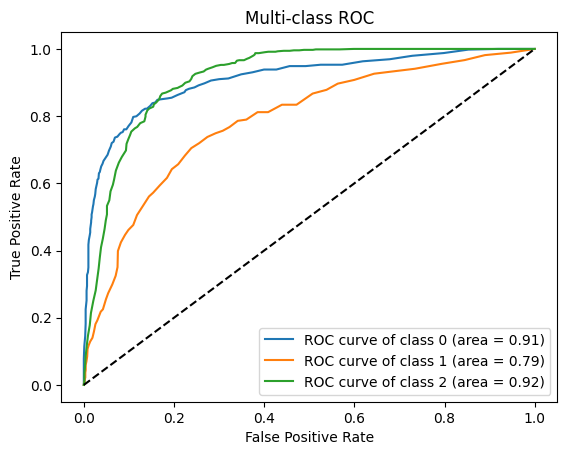

In [30]:

y_test_bin = label_binarize(student_y_test, classes=np.unique(student_y_test))
n_classes = y_test_bin.shape[1]

rf_probs = rf_model.predict_proba(student_x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], rf_probs[:, i]) # For Random Forest
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), rf_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()

In [33]:
rf_report = classification_report(student_y_test, rf_model.predict(student_x_test), digits = 5)
print(rf_report)


              precision    recall  f1-score   support

           0    0.80171   0.76892   0.78497       489
           1    0.54098   0.24354   0.33588       271
           2    0.76131   0.94126   0.84178       715

    accuracy                        0.75593      1475
   macro avg    0.70133   0.65124   0.65421      1475
weighted avg    0.73422   0.75593   0.72999      1475



In [14]:
best_xgb_model = Utils.find_best_xgb_parameters(student_X_train, student_Y_train, student_X_val, student_y_val)

--- 4.91426944732666 seconds ---
All Results:
{'n_estimators': 10, 'max_depth': 5, 'learning_rate': 0.01} with accuracy: 0.7380469186371253
{'n_estimators': 100, 'max_depth': 50, 'learning_rate': 0.01} with accuracy: 0.7370322100167567
{'n_estimators': 10, 'max_depth': 50, 'learning_rate': 0.01} with accuracy: 0.7197325141190344
{'n_estimators': 10, 'max_depth': 100, 'learning_rate': 0.1} with accuracy: 0.7385597033451251
{'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1} with accuracy: 0.7695789114379693
{'n_estimators': 50, 'max_depth': 100, 'learning_rate': 0.01} with accuracy: 0.728384689381245
{'n_estimators': 50, 'max_depth': 50, 'learning_rate': 0.1} with accuracy: 0.7538160181220133
{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1} with accuracy: 0.7675440637994165
{'n_estimators': 10, 'max_depth': 50, 'learning_rate': 0.1} with accuracy: 0.7385597033451251
{'n_estimators': 100, 'max_depth': 100, 'learning_rate': 0.1} with accuracy: 0.7538160181220133

Best pa

In [31]:
xgb_model, xgb_accuracy, xgb_f_score = Utils.accuracy_measure_xgb(student_x_train, student_y_train.ravel(), student_x_test, student_y_test.ravel(), n_estimators = 100, learning_rate = 0.1, max_depth = 5)

--- 0.5571415424346924 seconds ---
Filename: /home/ahmad/Desktop/Ai-Lab/Case Study 2/util.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    86    352.8 MiB    352.8 MiB           1       @profile
    87                                             def accuracy_measure_xgb(X_train, y_train, X_test, y_test, n_estimators=50, learning_rate=0.1, max_depth=10, subsample=0.5, colsample_bytree=0.5):
    88    352.8 MiB      0.0 MiB           1           import time
    89    352.8 MiB      0.0 MiB           1           import xgboost as xgb
    90    352.8 MiB      0.0 MiB           1           from sklearn.metrics import accuracy_score, precision_recall_fscore_support
    91                                             
    92    352.8 MiB      0.0 MiB           1           start_time = time.time()
    93    352.8 MiB      0.0 MiB           1           xgb_model = xgb.XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, subsample=subsamp

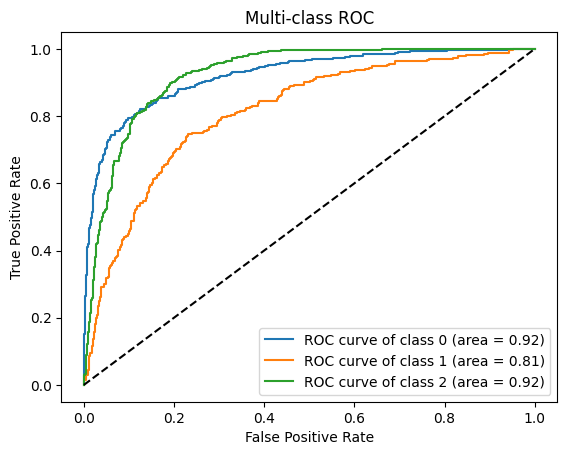

In [32]:
xgb_probs = xgb_model.predict_proba(student_x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], xgb_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), rf_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()

In [34]:
xgb_report = classification_report(student_y_test, xgb_model.predict(student_x_test), digits = 5)
print(xgb_report)

              precision    recall  f1-score   support

           0    0.81720   0.77710   0.79665       489
           1    0.54321   0.32472   0.40647       271
           2    0.78302   0.92867   0.84965       715

    accuracy                        0.76746      1475
   macro avg    0.71448   0.67683   0.68425      1475
weighted avg    0.75029   0.76746   0.75065      1475

